# Time Machine

In [3]:
from gensim.models import phrases, word2vec
from helpers import *
import nltk
import numpy as np
import codecs
from collections import Counter
from nltk.corpus import stopwords
import string
import gensim
import plotly 
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import re
import matplotlib.pyplot as plt
import os
import collections
from nltk.stem import PorterStemmer

In [6]:
#Reference: https://github.com/Ravikumar10593-hub/NLP/blob/main/Gensim_Word2vec/Gensim%20Word2Vec%20model.ipynb
# https://blog.devgenius.io/nlp-tutorial-gensim-word2vec-with-codes-8f6c4b1bdf14

### Chapter Segmentation 

In [4]:
with open("data/timemachine.txt", 'r', encoding="latin-1") as file:
    lines = file.read().splitlines()

lines_tokenized = [line.split() for line in lines]

print(lines_tokenized)

[[], [], [], ['CHAPTER', 'I.'], ['Introduction'], [], [], ['The', 'Time', 'Traveller', '(for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him)', 'was'], ['expounding', 'a', 'recondite', 'matter', 'to', 'us.', 'His', 'pale', 'grey', 'eyes', 'shone', 'and'], ['twinkled,', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated.', 'The', 'fire'], ['burnt', 'brightly,', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent', 'lights', 'in', 'the'], ['lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and', 'passed', 'in', 'our'], ['glasses.', 'Our', 'chairs,', 'being', 'his', 'patents,', 'embraced', 'and', 'caressed', 'us', 'rather'], ['than', 'submitted', 'to', 'be', 'sat', 'upon,', 'and', 'there', 'was', 'that', 'luxurious'], ['after-dinner', 'atmosphere,', 'when', 'thought', 'runs', 'gracefully', 'free', 'of', 'the'], ['trammels', 'of', 'precision.', 'And', 'he', 'put', 'it', 'to', 'us', 'in', 'this', 'wayÑmarking', 'th

In [5]:
# Chapter segmentation 
chapters = collections.defaultdict(list)
current_chapter = 0

# Regular expression pattern for chapter headings, which assumes Roman numerals.
chapter_pattern = re.compile('CHAPTER\s+[IVXLCDM]+', re.IGNORECASE)

for line in lines:
    if chapter_pattern.match(line.strip()):
        current_chapter += 1
    else:
        chapters[current_chapter].extend(line.split())


In [7]:
# pre-processing and chapter frequencies, no stemming 
stop_words = set(stopwords.words('english'))

chapter_word_freqs = {}

for chapter, words in chapters.items():
    word_freq = collections.Counter()
    for word in words:
        word = re.sub(r'\W+', '', word).lower()  # Remove non-alphanumeric characters
        if word and word not in stop_words:  # Ignore stop words
            word_freq[word] += 1
    chapter_word_freqs[chapter] = word_freq

# Print word frequencies for each chapter
for chapter, word_freq in chapter_word_freqs.items():
    print(f"Chapter {chapter if chapter != 0 else 'Preamble'}:")
    for word, freq in word_freq.most_common(10):  # Print top 10 words
        print(f"{word}: {freq}")
    print("\n")


Chapter Preamble:


Chapter 1:
time: 24
said: 21
dimensions: 13
man: 12
traveller: 11
filby: 10
space: 9
move: 9
us: 8
three: 7


Chapter 2:
time: 23
said: 19
traveller: 15
machine: 12
psychologist: 12
man: 8
table: 7
medical: 7
us: 7
thing: 5


Chapter 3:
time: 30
said: 23
traveller: 18
man: 16
editor: 16
us: 7
òi: 7
face: 7
medical: 6
dinner: 6


Chapter 4:
seemed: 12
saw: 12
like: 12
machine: 11
one: 10
minute: 9
time: 8
upon: 8
came: 7
white: 7


Chapter 5:
little: 15
people: 8
time: 7
flowers: 7
came: 6
one: 6
upon: 6
saw: 6
thing: 5
strange: 5


Chapter 6:
time: 11
would: 10
little: 8
upon: 7
things: 7
even: 7
conditions: 7
first: 6
world: 6
found: 6


Chapter 7:
little: 14
machine: 13
came: 12
could: 12
time: 11
sphinx: 9
bronze: 8
people: 8
must: 8
pedestal: 7


Chapter 8:
could: 17
one: 15
little: 15
must: 13
first: 12
time: 12
white: 12
see: 11
saw: 11
came: 11


Chapter 9:
could: 11
little: 11
one: 8
well: 8
last: 7
darkness: 7
saw: 7
light: 7
match: 7
morlocks: 6


Chapter 

In [6]:
# same code as above + stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

chapter_word_freqs = {}

for chapter, words in chapters.items():
    word_freq = collections.Counter()
    for word in words:
        word = re.sub(r'\W+', '', word).lower()  # Remove non-alphanumeric characters
        if word and word not in stop_words:  # Ignore stop words
            word = stemmer.stem(word)  # Stem the word
            word_freq[word] += 1
    chapter_word_freqs[chapter] = word_freq

# Print word frequencies for each chapter
for chapter, word_freq in chapter_word_freqs.items():
    print(f"Chapter {chapter if chapter != 0 else 'Preamble'}:")
    for word, freq in word_freq.most_common(10):  # Print top 10 words
        print(f"{word}: {freq}")
    print("\n")


Chapter Preamble:


Chapter 1:
time: 24
said: 21
travel: 16
dimens: 16
move: 12
man: 12
filbi: 10
space: 9
us: 8
three: 7


Chapter 2:
time: 25
travel: 23
said: 19
machin: 12
psychologist: 12
tabl: 8
look: 8
man: 8
medic: 7
us: 7


Chapter 3:
time: 30
said: 23
travel: 22
man: 16
editor: 16
face: 9
us: 7
òi: 7
word: 6
thing: 6


Chapter 4:
seem: 13
machin: 12
saw: 12
like: 12
one: 10
minut: 9
time: 8
upon: 8
look: 7
came: 7


Chapter 5:
littl: 15
peopl: 8
time: 7
flower: 7
fruit: 7
came: 6
one: 6
upon: 6
saw: 6
thing: 5


Chapter 6:
time: 11
would: 10
even: 10
condit: 9
thing: 8
littl: 8
upon: 7
come: 6
first: 6
world: 6


Chapter 7:
littl: 14
machin: 13
came: 12
could: 12
time: 11
sphinx: 9
look: 8
bronz: 8
face: 8
thing: 8


Chapter 8:
could: 17
time: 16
one: 15
littl: 15
thing: 15
see: 13
must: 13
well: 12
first: 12
dark: 12


Chapter 9:
dark: 12
could: 11
littl: 11
match: 11
hand: 9
one: 8
well: 8
feel: 8
time: 8
face: 8


Chapter 10:
night: 14
time: 13
morlock: 12
could: 12
came: 1

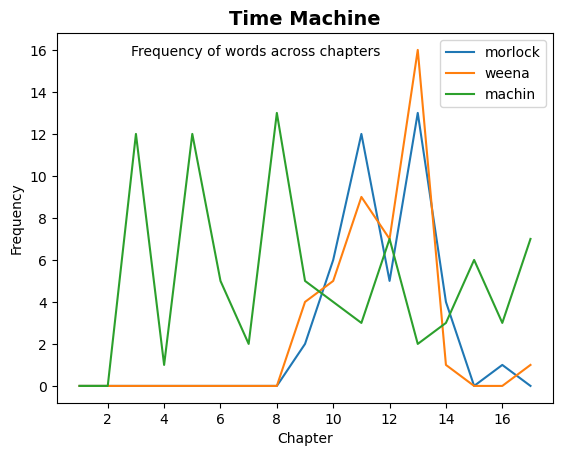

In [10]:
target_words = ["morlock", "weena", "machin"]

# Collect frequencies of target words
target_word_freqs = {word: [] for word in target_words}
for chapter, word_freq in chapter_word_freqs.items():
    for target_word in target_words:
        target_word_freqs[target_word].append(word_freq[target_word])

# Plot word frequencies
fig, ax = plt.subplots()
for word, freqs in target_word_freqs.items():
    ax.plot(range(1, len(freqs) + 1), freqs, label=word)

ax.set_xlabel('Chapter')
ax.set_ylabel('Frequency')
ax.set_title('Time Machine', fontsize=14, fontweight='bold')
ax.title.set_position([.5, 1.05])  # Adjusts position to act as a main title
ax.text(.4, .94, 'Frequency of words across chapters', fontsize=10, ha='center', transform=ax.transAxes)  # Adds subtitle
ax.legend()


# Ensure the figures directory exists
if not os.path.exists('figures'):
    os.makedirs('figures')
    
# Save the figure in the figures directory  
plt.savefig('figures/target_words_frequency_TM.png')

plt.show()

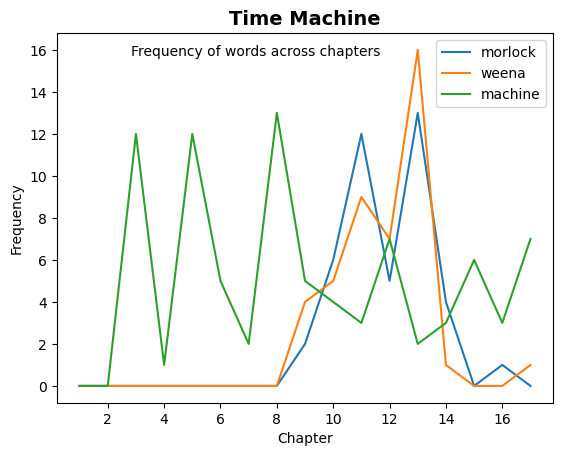

In [11]:
# This is code to solve the issue of machine and machin in the plot

import matplotlib.pyplot as plt
import os

target_words = ["morlock", "weena", "machin"]
original_words = ["morlock", "weena", "machine"]  # corresponds to the original words for the target_words

# Mapping between target words and original words
word_mapping = dict(zip(target_words, original_words))

# Collect frequencies of target words
target_word_freqs = {word: [] for word in target_words}
for chapter, word_freq in chapter_word_freqs.items():
    for target_word in target_words:
        target_word_freqs[target_word].append(word_freq[target_word])

# Plot word frequencies
fig, ax = plt.subplots()
for word, freqs in target_word_freqs.items():
    ax.plot(range(1, len(freqs) + 1), freqs, label=word_mapping[word])

ax.set_xlabel('Chapter')
ax.set_ylabel('Frequency')
ax.set_title('Time Machine', fontsize=14, fontweight='bold')
ax.title.set_position([.5, 1.05])  # Adjusts position to act as a main title
ax.text(.4, .94, 'Frequency of words across chapters', fontsize=10, ha='center', transform=ax.transAxes)  # Adds subtitle
ax.legend()

# Ensure the figures directory exists
if not os.path.exists('figures'):
    os.makedirs('figures')

# Save the figure in the figures directory  
plt.savefig('figures/target_words_frequency_TM_stem.png')

plt.show()
